In [1]:
import pandas as pd
import requests
import zipfile
import geopandas as gpd
from io import BytesIO
import matplotlib.pyplot as plt
from shapely.geometry import Point, box
import os
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import atlite
import geopandas as gpd

### Redispatch Analysis

#### A) GIS Nuts-3 file: Germany

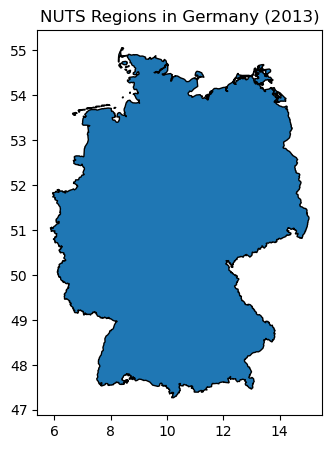

In [2]:
eu = gpd.read_file(r"C:\Users\par19744\Python_projects\ASSUME_project\ASSUME_Use_case\2035\assume\examples\inputs\example_06ab_analysis\NUTS_RG_03M_2013_4326_LEVL_0.shp.zip")
germany_nuts3 = eu[eu['CNTR_CODE'] == 'DE']
germany_nuts3.plot(figsize=(5, 5), edgecolor="black")
plt.title("NUTS Regions in Germany (2013)")
plt.show()

In [3]:
# Load buses data
buses_df = pd.read_csv("buses.csv")
buses_df=buses_df[['name','v_nom','x','y','carrier']]

# Convert buses DataFrame to a GeoDataFrame using longitude (x) and latitude (y)
geometry = [Point(xy) for xy in zip(buses_df['x'], buses_df['y'])]
buses_gdf = gpd.GeoDataFrame(buses_df, geometry=geometry, crs="EPSG:4326")

# Ensure the CRS matches between the NUTS3 shapefile and buses GeoDataFrame
buses_gdf = buses_gdf.to_crs(germany_nuts3.crs)

# Perform a spatial join to classify nodes into NUTS3 regions
buses_NUTS3 = gpd.sjoin(buses_gdf, germany_nuts3, how="left", predicate="within")

# Display the classified buses with their NUTS3 region info
buses_NUTS3 = buses_NUTS3[['name', 'x', 'y', 'NUTS_ID', 'geometry']]

# Explicitly convert classified_buses to a GeoDataFrame, ensuring geometry is set
buses_NUTS3 = gpd.GeoDataFrame(buses_NUTS3, geometry="geometry", crs=germany_nuts3.crs)
buses_NUTS3.head(2)

,name,x,y,NUTS_ID,geometry
0,DE1-220,13.677140,54.817281,NaN,POINT (13.67714 54.81728)
1,DE10-380,9.552734,53.563511,DE,POINT (9.55273 53.56351)


#### B) Market Orders: Germany

In [5]:
market_orders=pd.read_csv(r'C:\Users\par19744\Python_projects\ASSUME_project\ASSUME_Use_case\2035\assume\examples\outputs\example_06a_base\market_orders.csv',nrows=50_000)
print(market_orders.columns)
print(market_orders.dtypes)
print(market_orders.head(3))

Index(['start_time', 'accepted_price', 'accepted_volume', 'bid_id', 'bid_type',
       'end_time', 'market_id', 'max_power', 'min_power', 'node', 'price',
       'simulation', 'unit_id', 'volume'],
      dtype='object')
start_time          object
accepted_price       int64
accepted_volume    float64
bid_id              object
bid_type           float64
end_time            object
market_id           object
max_power          float64
min_power          float64
node                object
price              float64
simulation          object
unit_id             object
volume             float64
dtype: object
            start_time  accepted_price  accepted_volume      bid_id  bid_type  \
0  2035-01-02 00:00:00               0           26.208  Unit_246_1       NaN   
1  2035-01-02 01:00:00               0           26.208  Unit_246_3       NaN   
2  2035-01-02 02:00:00               0           39.312  Unit_246_6       NaN   

              end_time market_id  max_power  min_power         

In [ ]:
start_time, accepted_volume,market_id, node, unit_id